In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

label is :  38
40


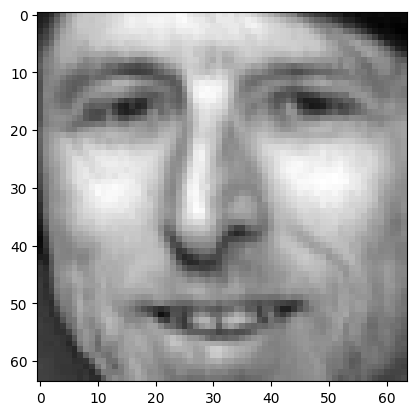

In [ ]:
faces_raw = np.load('olivetti_faces.npy')
labels_raw = np.load('olivetti_faces_target.npy')

shuffleidx = np.arange(len(faces_raw))

np.random.shuffle(shuffleidx)

faces = faces_raw[shuffleidx]
labels = labels_raw[shuffleidx]

No_of_class = len(np.unique(labels))


plt.imshow(faces[0],cmap='gray')
print("label is : ",labels[0])
print(No_of_class)

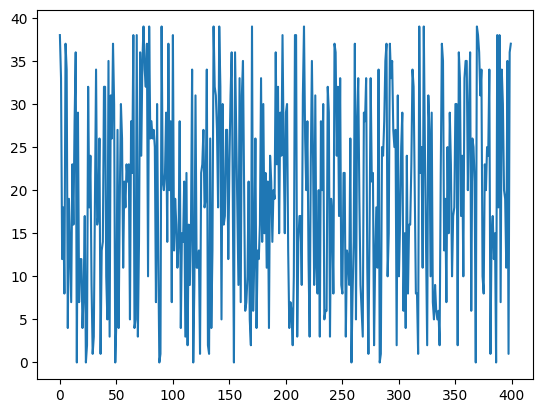

In [ ]:
# Check well shuffled or Not
No_of_img = np.arange(len(labels))
plt.plot(No_of_img,labels)


convert each image from nXn to 1X(n^2)

In [ ]:
pip install scikit-learn


Accuracy: 91.00%


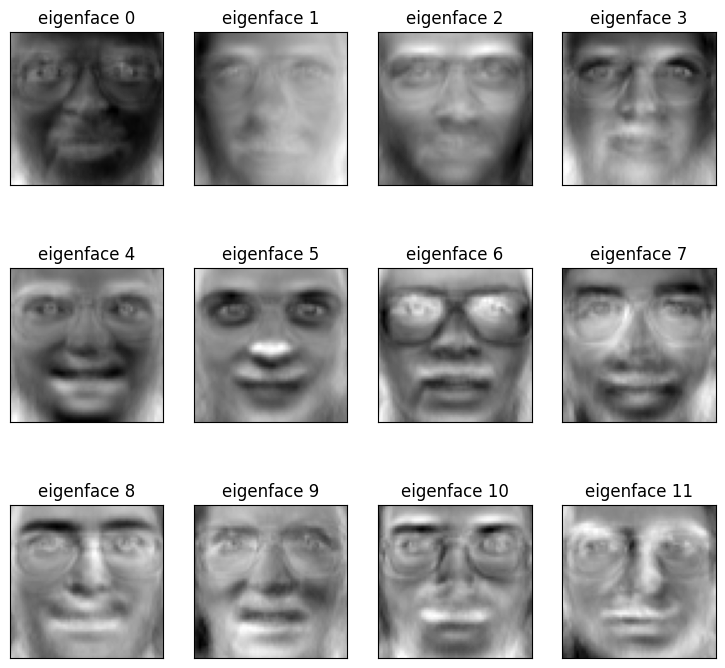

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Olivetti Faces dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_images = faces_data.images.reshape((len(faces_data.images), -1))
labels = faces_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(faces_images, labels, test_size=0.25, random_state=42)

# Perform PCA for dimensionality reduction
n_components = 150  # You can adjust this parameter based on your needs
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

# Apply PCA to the training and testing sets
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a support vector machine (SVM) classifier on the reduced data
svm_classifier = SVC(kernel='rbf', class_weight='balanced', C=1e3)
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test_pca)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Obtain the eigenfaces
eigenfaces = pca.components_.reshape((n_components, faces_data.images.shape[1], faces_data.images.shape[2]))

# Visualization (optional)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, faces_data.images.shape[1], faces_data.images.shape[2])

plt.show()
